<a href="https://colab.research.google.com/github/PrajwalRedee/Formula-1-Data-Analysis/blob/main/F1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formula 1 - An Exploratory Data Analysis

In [1]:
from urllib.request import urlretrieve
import os
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Downloading the dataset

These are the ulr's of the dataset


In [3]:
url_circuits = 'https://gist.githubusercontent.com/harikanth-m/f15b47aeab0d75c128824d0f72821db1/raw/circuits.csv'
url_const_results = 'https://gist.githubusercontent.com/harikanth-m/f41f068dca8a309c81a04c6a45fecf58/raw/constructor_results.csv'
url_const_standings = 'https://gist.githubusercontent.com/harikanth-m/ccf0bd917f013d34928ae8c9b695059c/raw/constructor_standings.csv'
url_const = 'https://gist.githubusercontent.com/harikanth-m/f128413f4bff5c3c901b9a8c599a78b9/raw/constructors.csv'
url_driver_standings = 'https://gist.githubusercontent.com/harikanth-m/fcdb3e6650972ee6f0db07288074b0b7/raw/driver_standings.csv'
url_drivers = 'https://gist.githubusercontent.com/harikanth-m/d37be6c8c871300822bf8676e2206d9b/raw/drivers.csv'
url_lap_times = 'https://gist.githubusercontent.com/harikanth-m/61770032a57dd013651163142589b2bc/raw/lap_times.csv'
url_pit_stops = 'https://gist.githubusercontent.com/harikanth-m/45d94ae5a8b8e7f0cace662cc7942d04/raw/pit_stops.csv'
url_qualifying = 'https://gist.githubusercontent.com/harikanth-m/08f55f6687874c5a0bf01790c477e4bc/raw/qualifying.csv'
url_races = 'https://gist.githubusercontent.com/harikanth-m/9382cffceb1264e246fae76e4989cc31/raw/races.csv'
url_results = 'https://gist.githubusercontent.com/harikanth-m/6b1b6e36d3709abf3b97fc703303471b/raw/results.csv'
url_status = 'https://gist.githubusercontent.com/harikanth-m/c1bb17485523243929c57f4f13d4fcba/raw/status.csv'
url_schema = 'https://gist.githubusercontent.com/harikanth-m/71f7fd19c8afba09ad99664ece517268/raw/f1db_schema.txt'

In [4]:
os.makedirs('./data', exist_ok=True)

Retrieving the data

In [5]:
urlretrieve(url_circuits, './data/circuits.csv')
urlretrieve(url_const_results, './data/constructor_results.csv')
urlretrieve(url_const_standings, './data/constructor_standings.csv')
urlretrieve(url_const, './data/constructors.csv')
urlretrieve(url_driver_standings,'./data/driver_standings.csv')
urlretrieve(url_drivers, './data/drivers.csv')
urlretrieve(url_lap_times, './data/lap_times.csv')
urlretrieve(url_pit_stops, './data/pit_stops.csv')
urlretrieve(url_qualifying, './data/qualifying.csv')
urlretrieve(url_races, './data/races.csv')
urlretrieve(url_results, './data/results.csv')
urlretrieve(url_status, './data/status.csv')
urlretrieve(url_schema, './data/f1db_schema.txt');

Lets check if the files are in the directory

In [6]:
os.listdir('data')


['constructor_standings.csv',
 'races.csv',
 'constructor_results.csv',
 'f1db_schema.txt',
 'results.csv',
 'drivers.csv',
 'constructors.csv',
 'status.csv',
 'circuits.csv',
 'lap_times.csv',
 'qualifying.csv',
 'driver_standings.csv',
 'pit_stops.csv']

In [7]:
schema = open('./data/f1db_schema.txt', 'r')
print(schema.read())

+----------------------+
| Tables_in_f1db       |
+----------------------+
| circuits             |
| constructorResults   |
| constructorStandings |
| constructors         |
| driverStandings      |
| drivers              |
| lapTimes             |
| pitStops             |
| qualifying           |
| races                |
| results              |
| seasons              |
| status               |
+----------------------+

circuits.csv
+------------+--------------+------+-----+---------+----------------+
| Field      | Type         | Null | Key | Default | Extra          |
+------------+--------------+------+-----+---------+----------------+
| circuitId  | int(11)      | NO   | PRI | NULL    | auto_increment |
| circuitRef | varchar(255) | NO   |     |         |                |
| name       | varchar(255) | NO   |     |         |                |
| location   | varchar(255) | YES  |     | NULL    |                |
| country    | varchar(255) | YES  |     | NULL    |                |
|

### Races file

In [8]:
races_raw_df = pd.read_csv('data/races.csv')
races_raw_df

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,13:10:00,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,13:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,15:10:00,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,15:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [9]:
races_raw_df = races_raw_df.sort_values('date')
races_raw_df


,raceId,year,round,circuitId,name,date,time,url
832,833,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...
833,834,1950,2,6,Monaco Grand Prix,1950-05-21,\N,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
834,835,1950,3,19,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,13:10:00,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,13:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,15:10:00,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,15:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


We can see that the data starts from 1950

In [10]:
races_df = races_raw_df[races_raw_df.date <= '2020-09-27']
races_df

,raceId,year,round,circuitId,name,date,time,url
832,833,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...
833,834,1950,2,6,Monaco Grand Prix,1950-05-21,\N,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
834,835,1950,3,19,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
...,...,...,...,...,...,...,...,...
1023,1036,2020,6,4,Spanish Grand Prix,2020-08-16,13:10:00,https://en.wikipedia.org/wiki/2020_Spanish_Gra...
1024,1037,2020,7,13,Belgian Grand Prix,2020-08-30,13:10:00,https://en.wikipedia.org/wiki/2020_Belgian_Gra...
1025,1038,2020,8,14,Italian Grand Prix,2020-09-06,13:10:00,https://en.wikipedia.org/wiki/2020_Italian_Gra...
1026,1039,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...


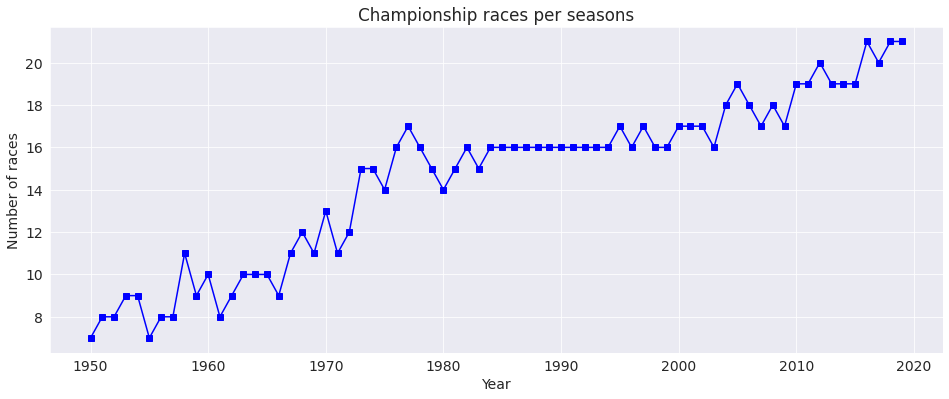

In [11]:
idx = races_df.groupby(['year'])['date'].transform(max) == races_df['date']
season_finale = races_df[idx].rename(columns = {'round' : 'tot_races'}) 
season_finale = season_finale[season_finale.year != 2020] # A new data frame with season-ending races only, excluding the 2020 season

# Plotting
plt.figure(figsize=(16, 6))

plt.plot(season_finale.year, season_finale.tot_races, 's-b')
plt.xlabel('Year')
plt.ylabel('Number of races')
plt.title("Championship races per seasons");

We can that in 1950 there were only 7 races. As the the years passed by the number of races has also increased.
In the year 2019 there were around 21 races

## Circuits file

In [12]:
circuits_raw_df = pd.read_csv('data/circuits.csv')
circuits_raw_df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.77690,-74.01110,\N,http://en.wikipedia.org/wiki/Port_Imperial_Str...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,\N,http://en.wikipedia.org/wiki/Baku_City_Circuit
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,\N,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,\N,http://en.wikipedia.org/wiki/Algarve_Internati...


There are 76 different circuits. But lets check if all these circuits have hosted the F1 races

In [13]:
host_circuits =  races_df.drop(['date', 'time', 'url', 'round'], axis = 1).rename(columns = {'name':'gp_name'}).merge(
    circuits_raw_df.drop(['lat', 'lng', 'alt', 'url'], 1).rename(columns = {'name':'cir_name'}), how = 'left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [14]:
host_circuits

,raceId,year,circuitId,gp_name,circuitRef,cir_name,location,country
0,833,1950,9,British Grand Prix,silverstone,Silverstone Circuit,Silverstone,UK
1,834,1950,6,Monaco Grand Prix,monaco,Circuit de Monaco,Monte-Carlo,Monaco
2,835,1950,19,Indianapolis 500,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA
3,836,1950,66,Swiss Grand Prix,bremgarten,Circuit Bremgarten,Bern,Switzerland
4,837,1950,13,Belgian Grand Prix,spa,Circuit de Spa-Francorchamps,Spa,Belgium
...,...,...,...,...,...,...,...,...
1023,1036,2020,4,Spanish Grand Prix,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
1024,1037,2020,13,Belgian Grand Prix,spa,Circuit de Spa-Francorchamps,Spa,Belgium
1025,1038,2020,14,Italian Grand Prix,monza,Autodromo Nazionale di Monza,Monza,Italy
1026,1039,2020,76,Tuscan Grand Prix,mugello,Autodromo Internazionale del Mugello,Mugello,Italy


In [15]:
host_circuits['circuitId'].nunique()

73

73 different circuits around the world have hosted a Formula 1 race

Lets look at the top 10 circuits that have hosted the number of races

In [16]:
top_hosts = host_circuits[['cir_name']].cir_name.value_counts().reset_index().rename(
           columns={'index': 'name', 'cir_name': 'counts'}).head(10)
top_hosts

,name,counts
0,Autodromo Nazionale di Monza,70
1,Circuit de Monaco,66
2,Silverstone Circuit,55
3,Circuit de Spa-Francorchamps,53
4,Nürburgring,40
5,Circuit Gilles Villeneuve,40
6,Hockenheimring,37
7,Autódromo José Carlos Pace,37
8,Hungaroring,35
9,Suzuka Circuit,31


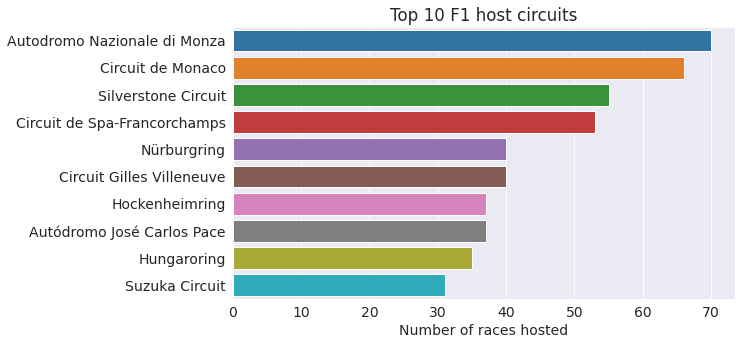

In [17]:
# plt.figure(figsize = (12,6))

sns.barplot(x=top_hosts.counts, y=top_hosts.name)
plt.title('Top 10 F1 host circuits')
plt.xlabel('Number of races hosted')
plt.ylabel('');

In [18]:
host_countries = host_circuits[['raceId', 'year', 'country']].groupby(
    ['year','country']).size().reset_index().rename(columns = {0:'Races'})
host_countries

,year,country,Races
0,1950,Belgium,1
1,1950,France,1
2,1950,Italy,1
3,1950,Monaco,1
4,1950,Switzerland,1
...,...,...,...
955,2020,Hungary,1
956,2020,Italy,2
957,2020,Russia,1
958,2020,Spain,1


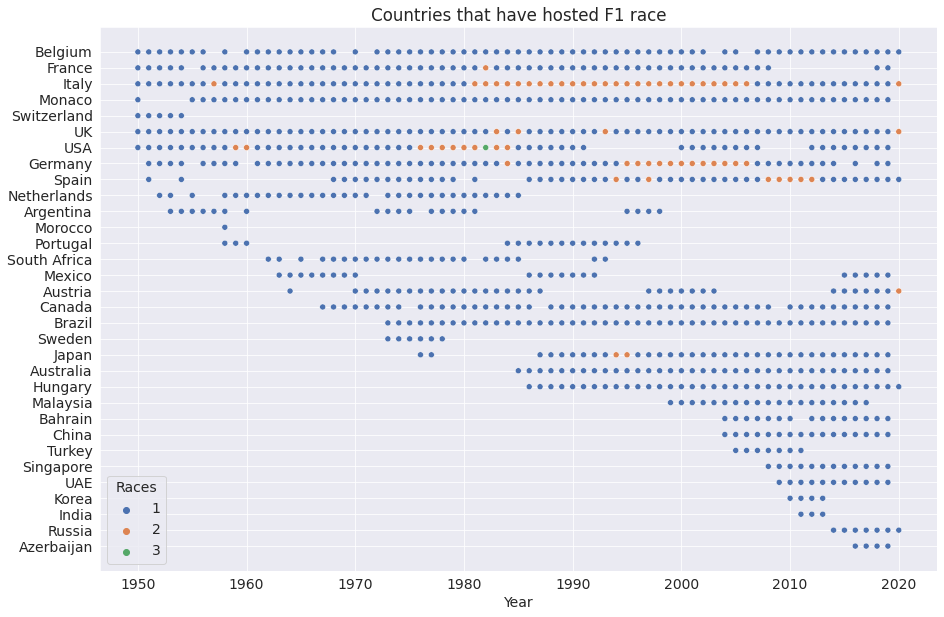

In [19]:
plt.figure(figsize = (15,10))

sns.scatterplot(data = host_countries, x = 'year', y = 'country', hue = 'Races', palette="deep")
plt.title('Countries that have hosted F1 race')
plt.xlabel('Year')
plt.ylabel('');

We can see that European countries have hosted more F1 races than other countries

## Constructors

In [20]:
constructors_raw = pd.read_csv('data/constructors.csv')
constructors_raw

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,212,alpha_tauri,Scuderia Alpha Tauri,Italian,http://en.wikipedia.org/wiki/Scuderia_Alpha_Tauri


In [21]:
const_country = constructors_raw[['constructorId', 'nationality']].groupby(
    'nationality').count().rename(columns = {'constructorId' : 'counts'})
const_country = const_country[const_country.counts >= 10].sort_values('counts', ascending = False)
const_country.loc['Others'] = [(len(constructors_raw) - const_country.counts.sum())]
const_country

,counts
nationality,
British,86
American,39
Italian,31
French,12
German,10
Others,33


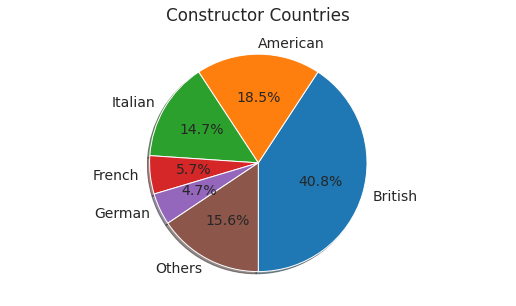

In [22]:
plt.axis('equal')
plt.title('Constructor Countries')
plt.pie(const_country.counts,labels=const_country.index, autopct='%1.1f%%',
        shadow=True, startangle=270);

We can see that many teams are in British, that is 41.1%

## Result File

In [23]:
results_raw = pd.read_csv('data/results.csv')
results_raw

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24815,24821,1040,849,3,6,20,16,16,16,0.0,52,\N,\N,47,18,1:41.044,208.352,11
24816,24822,1040,154,210,8,16,17,17,17,0.0,52,\N,\N,44,15,1:39.614,211.343,11
24817,24823,1040,847,3,63,13,18,18,18,0.0,52,\N,\N,52,4,1:37.352,216.254,11
24818,24824,1040,832,1,55,6,\N,R,19,0.0,0,\N,\N,\N,0,\N,\N,3


Lets look at the number of race victories

In [24]:
results_wins = results_raw[results_raw['position'] == '1']
results_wins

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
22,23,19,8,6,1,2,1,1,1,10.0,56,1:31:18.555,5478555,37,2,1:35.405,209.158,1
44,45,20,13,6,2,2,1,1,1,10.0,57,1:31:06.970,5466970,38,3,1:33.600,208.153,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
88,89,22,13,6,2,1,1,1,1,10.0,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24720,24726,1036,1,131,44,1,1,1,1,25.0,66,1:31:45.279,5505279,63,2,1:19.822,209.942,1
24740,24746,1037,1,131,44,1,1,1,1,25.0,44,1:24:08.761,5048761,28,2,1:47.758,233.990,1
24760,24766,1038,842,213,10,10,1,1,1,25.0,53,1:47:06.056,6426056,34,6,1:24.037,248.162,1
24780,24786,1039,1,131,44,1,1,1,1,26.0,59,2:19:35.060,8375060,58,1,1:18.833,239.518,1


There were only 1028 races and above column has 1031 wins.
Lets remove the duplicates

In [25]:
results_wins[results_wins.duplicated(subset=['raceId'])]


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20185,20186,828,579,51,8,7,1,1,1,5.0,77,3:22:11.0,12131000,\N,\N,\N,\N,1
20266,20267,784,579,6,34,3,1,1,1,5.0,98,3:00:03.7,10803700,\N,\N,\N,\N,1
20288,20291,780,475,118,20,3,1,1,1,5.0,90,3:06:37.8,11197800,\N,\N,\N,\N,1


Lets check the most number of wins

In [26]:
const_wins = results_wins.drop_duplicates(subset = ['raceId']) 
const_win_counts = const_wins[['constructorId', 'raceId']].groupby(
    'constructorId').count().reset_index().rename(columns = {'raceId':'wins'})
const_win_counts = const_win_counts.merge(constructors_raw, on = 'constructorId').sort_values('wins', ascending = False)
const_win_counts

,constructorId,wins,constructorRef,name,nationality,url
5,6,238,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
0,1,178,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,3,114,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
31,131,110,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
6,9,63,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
14,32,45,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus
3,4,35,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
9,22,27,benetton,Benetton,Italian,http://en.wikipedia.org/wiki/Benetton_Formula
12,25,23,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing
15,34,23,brabham,Brabham,British,http://en.wikipedia.org/wiki/Brabham


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


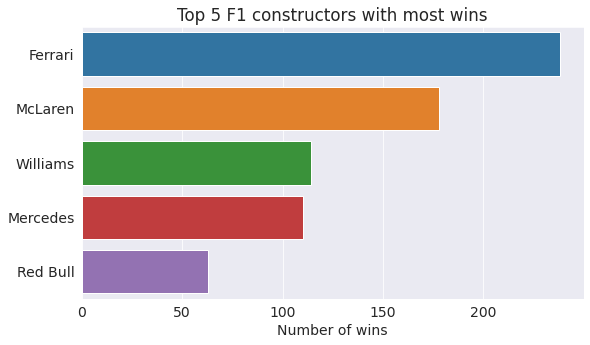

In [27]:
sns.barplot(const_win_counts.head(5).wins, const_win_counts.head(5).name)
plt.title('Top 5 F1 constructors with most wins')
plt.xlabel('Number of wins')
plt.ylabel('');

## Driver file

In [28]:
drivers_raw = pd.read_csv('data/drivers.csv')
drivers_raw

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
843,845,sirotkin,35,SIR,Sergey,Sirotkin,1995-08-27,Russian,http://en.wikipedia.org/wiki/Sergey_Sirotkin_(...
844,846,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
845,847,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...
846,848,albon,23,ALB,Alexander,Albon,1996-03-23,Thai,http://en.wikipedia.org/wiki/Alexander_Albon


Lets check the drivers nationality

In [29]:
drivers_country = drivers_raw[['driverId', 'nationality']].groupby('nationality').count().rename(
    columns = {'driverId' : 'counts'})
drivers_country = drivers_country[drivers_country.counts > 40].sort_values('counts', ascending = False)
drivers_country.loc['Others'] = [(len(drivers_raw) - drivers_country.counts.sum())]
drivers_country

,counts
nationality,
British,164
American,157
Italian,99
French,73
German,49
Others,306


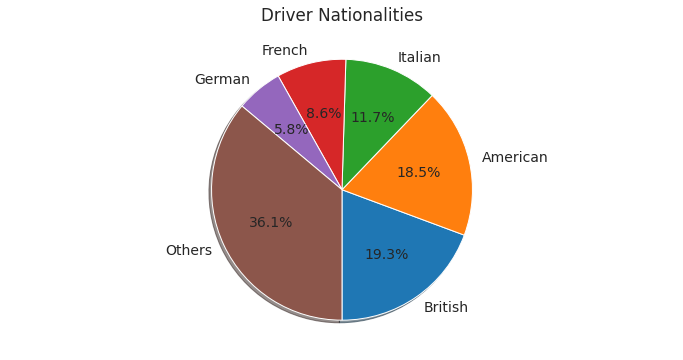

In [30]:
plt.figure(figsize=(12,6))
plt.axis('equal')

plt.title('Driver Nationalities')
plt.pie(drivers_country.counts, labels=drivers_country.index, autopct='%1.1f%%',
        shadow=True, startangle=270);

Lets try to prepare a statistics for each driver.

In [31]:
def podium_counter(pos):
    if pos in ['1', '2', '3']:
        return True
    else:
        return False

def win_counter(pos):
    if pos == '1':
        return True
    else:
        return False
    
def pole_counter(grid):
    if grid == 1:
        return True
    else:
        return False

In [32]:
results_copy = results_raw[['raceId', 'driverId', 'grid', 'position', 'points', 'laps']].copy()

In [33]:
results_copy

,raceId,driverId,grid,position,points,laps
0,18,1,1,1,10.0,58
1,18,2,5,2,8.0,58
2,18,3,7,3,6.0,58
3,18,4,11,4,5.0,58
4,18,5,3,5,4.0,58
...,...,...,...,...,...,...
24815,1040,849,20,16,0.0,52
24816,1040,154,16,17,0.0,52
24817,1040,847,13,18,0.0,52
24818,1040,832,6,\N,0.0,0


In [34]:
results_copy['podium'] = results_copy.position.apply(podium_counter)
results_copy['win'] = results_copy.position.apply(win_counter)
results_copy['pole'] = results_copy.grid.apply(pole_counter)

In [35]:
results_copy

,raceId,driverId,grid,position,points,laps,podium,win,pole
0,18,1,1,1,10.0,58,True,True,True
1,18,2,5,2,8.0,58,True,False,False
2,18,3,7,3,6.0,58,True,False,False
3,18,4,11,4,5.0,58,False,False,False
4,18,5,3,5,4.0,58,False,False,False
...,...,...,...,...,...,...,...,...,...
24815,1040,849,20,16,0.0,52,False,False,False
24816,1040,154,16,17,0.0,52,False,False,False
24817,1040,847,13,18,0.0,52,False,False,False
24818,1040,832,6,\N,0.0,0,False,False,False


In [36]:
driver_stats_1 = results_copy.drop(columns = ['position', 'grid']).groupby('driverId')
func_dic = {'raceId':'count', 'points':'sum', 'laps':'sum', 'podium':'sum', 'win':'sum', 'pole':'sum'}
driver_stats_1 = driver_stats_1.aggregate(func_dic).reset_index().rename(columns = {'raceId':'races'})
driver_stats_1

,driverId,races,points,laps,podium,win,pole
0,1,260,3636.0,14807,159,90,96
1,2,184,259.0,9699,13,0,1
2,3,206,1594.5,11159,57,23,30
3,4,314,1899.0,16778,97,32,22
4,5,112,105.0,5975,4,1,1
...,...,...,...,...,...,...,...
843,845,21,1.0,1118,0,0,0
844,846,31,114.0,1690,1,0,0
845,847,31,0.0,1710,0,0,0
846,848,31,156.0,1831,1,0,0


Now we have the stats of each driver. 

In [37]:
driver_st_raw = pd.read_csv('data/driver_standings.csv')
driver_st_raw

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
32768,70031,1040,825,1.0,18,18,0
32769,70032,1040,840,57.0,8,8,0
32770,70033,1040,817,63.0,6,6,0
32771,70034,1040,830,128.0,3,3,1


Lets collect the stats of all the driver chapions of each season

In [38]:
driver_st_season_end = season_finale[['raceId', 'year', 'tot_races']].merge(driver_st_raw, on = 'raceId')
driver_champ = driver_st_season_end[driver_st_season_end['position'] == 1]
driver_champ_tot = driver_champ[['driverId', 'position']].groupby('driverId').sum().reset_index().merge(
    drivers_raw[['forename', 'surname', 'driverId']]).rename(
    columns={'position':'titles'}).sort_values('titles', ascending = False)
driver_champ_tot

,driverId,titles,forename,surname
6,30,7,Michael,Schumacher
0,1,6,Lewis,Hamilton
30,579,5,Juan,Fangio
5,20,4,Sebastian,Vettel
12,117,4,Alain,Prost
11,102,3,Ayrton,Senna
25,356,3,Jack,Brabham
23,328,3,Jackie,Stewart
13,137,3,Nelson,Piquet
16,182,3,Niki,Lauda


Now lets merge the driver champions stats and stats of each driver together

In [39]:
driver_stats = driver_stats_1.merge(driver_champ_tot[['driverId', 'titles']], how = 'left').fillna(0)
driver_stats = drivers_raw[['driverId', 'forename', 'surname', 'nationality']].merge(driver_stats, on = 'driverId')
driver_stats

,driverId,forename,surname,nationality,races,points,laps,podium,win,pole,titles
0,1,Lewis,Hamilton,British,260,3636.0,14807,159,90,96,6.0
1,2,Nick,Heidfeld,German,184,259.0,9699,13,0,1,0.0
2,3,Nico,Rosberg,German,206,1594.5,11159,57,23,30,1.0
3,4,Fernando,Alonso,Spanish,314,1899.0,16778,97,32,22,2.0
4,5,Heikki,Kovalainen,Finnish,112,105.0,5975,4,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
843,845,Sergey,Sirotkin,Russian,21,1.0,1118,0,0,0,0.0
844,846,Lando,Norris,British,31,114.0,1690,1,0,0,0.0
845,847,George,Russell,British,31,0.0,1710,0,0,0,0.0
846,848,Alexander,Albon,Thai,31,156.0,1831,1,0,0,0.0


## Conclusion

* We have stats of each driver.
* We analyzed the number of races happened in each season
* Countries that have hosted F1 race
* F1 contsructor countries
* Top teams with most F1 wins
